Experiment with watts strogatz social networks

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def generate_graph_and_features(n, k, p):
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)
    adj_matrix = nx.to_numpy_array(G)
    return G, adj_matrix

In [3]:
def plot_graph_clusters(G, labels, title=""):
    pos = nx.spring_layout(G, seed=42)
    unique_labels = np.unique(labels)
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
    node_colors = [color_map[label] for label in labels]
    nx.draw(G, pos, node_color=node_colors, with_labels=True)
    plt.title(title)
    plt.show()

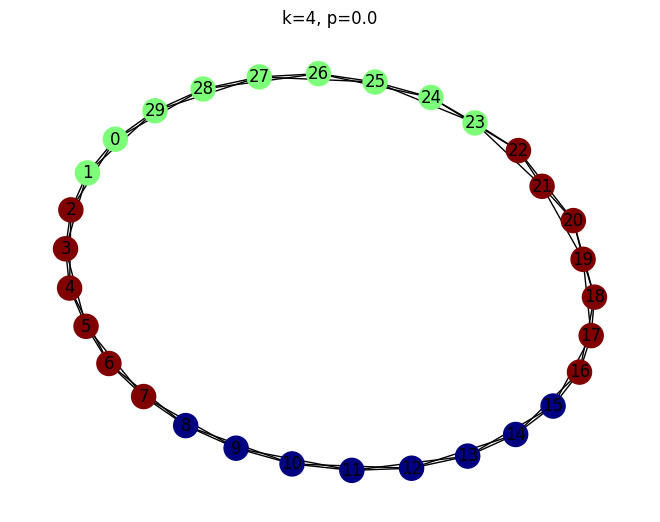

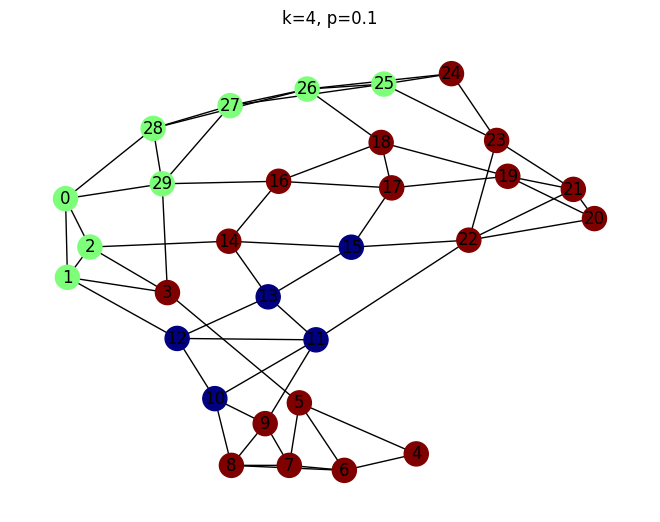

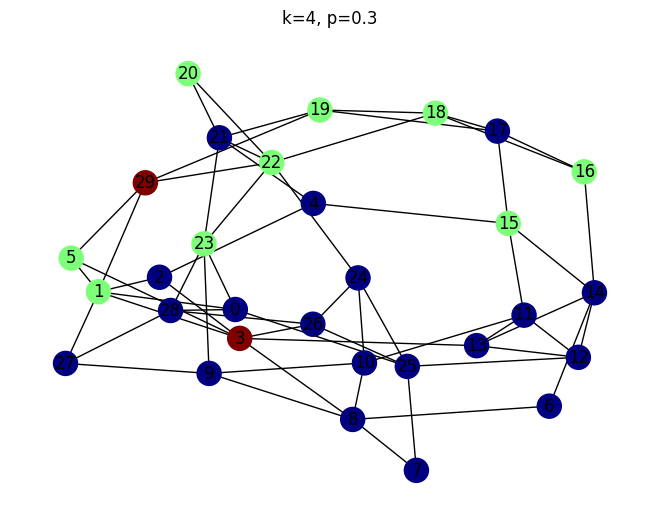

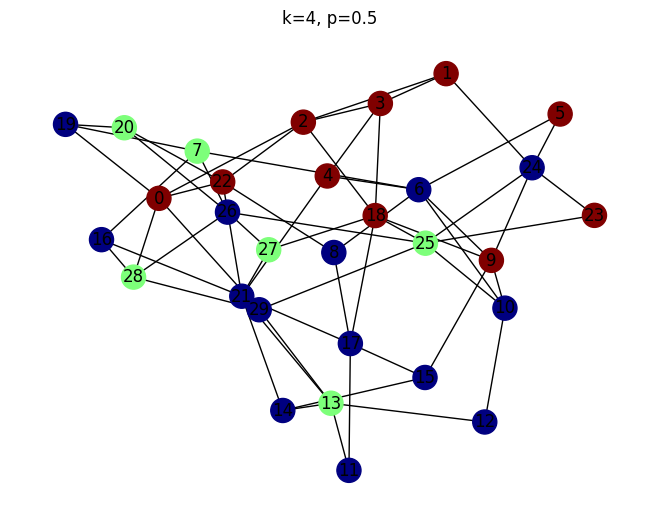

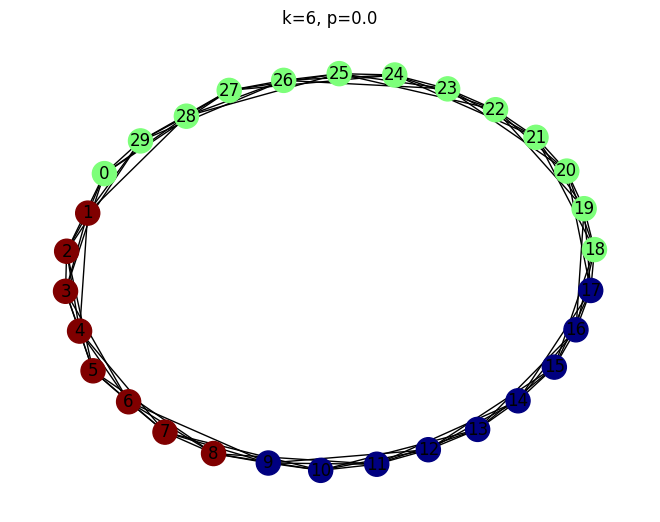

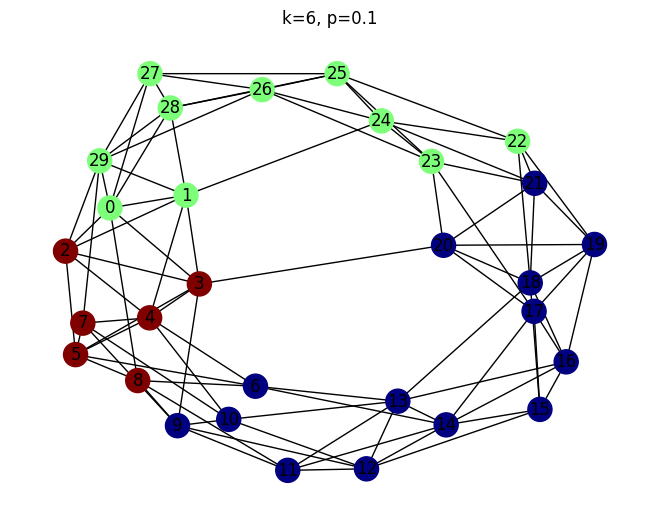

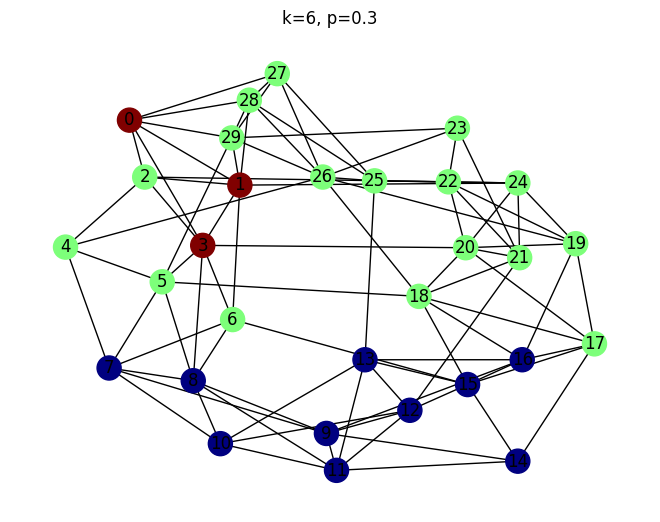

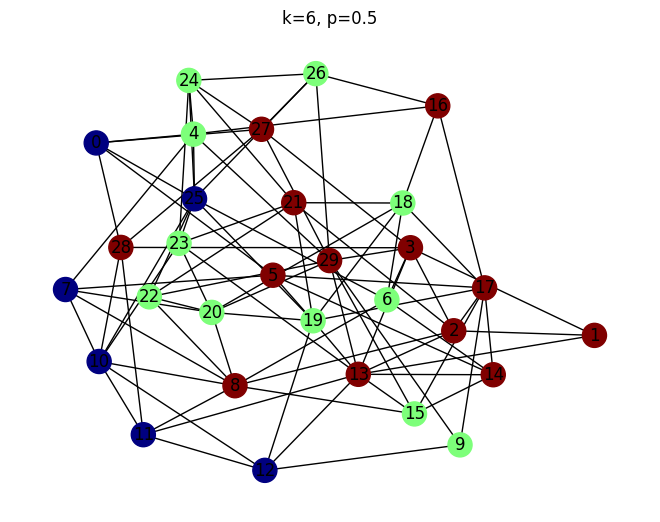

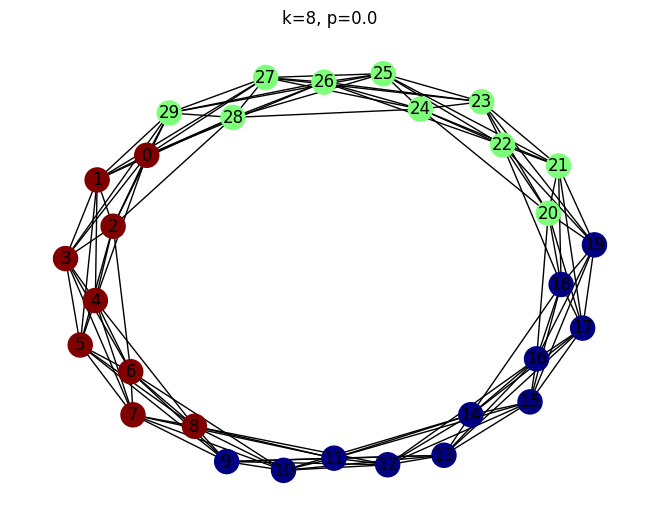

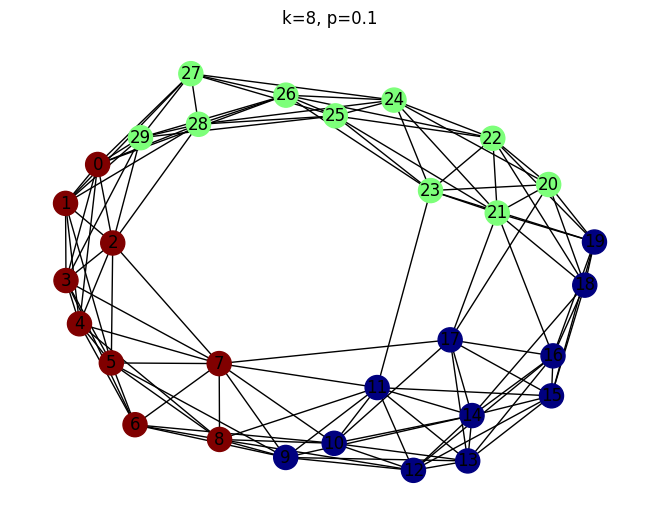

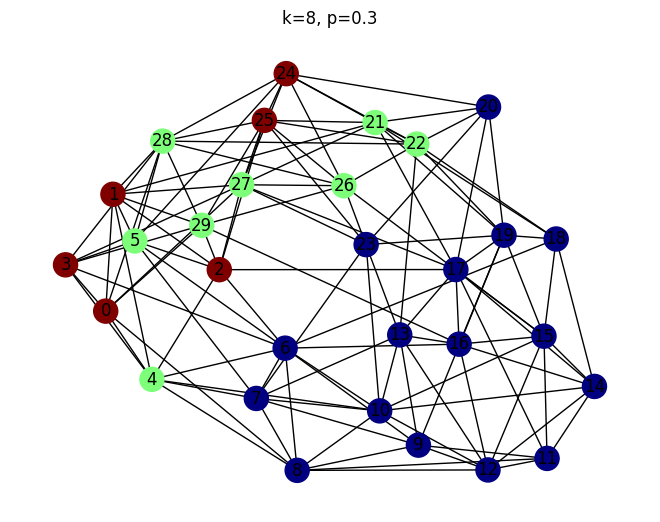

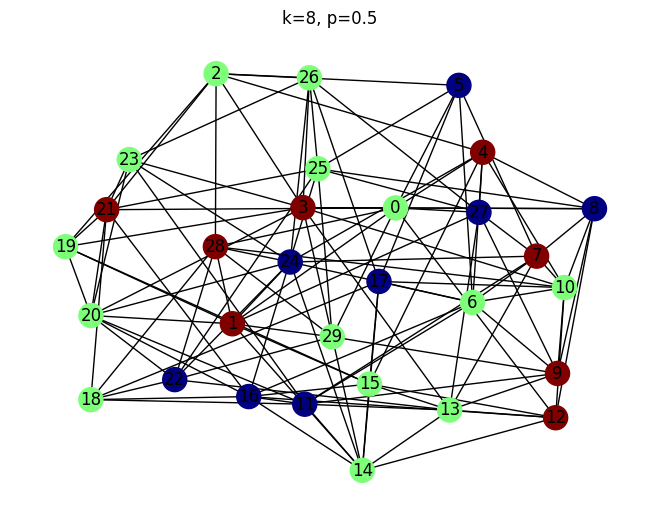

[{'k': 4,
  'p': 0.0,
  'clustering_coefficient': 0.5,
  'shortest_path_length': 4.137931034482759},
 {'k': 4,
  'p': 0.1,
  'clustering_coefficient': 0.39444444444444443,
  'shortest_path_length': 3.004597701149425},
 {'k': 4,
  'p': 0.3,
  'clustering_coefficient': 0.2111111111111112,
  'shortest_path_length': 2.5701149425287357},
 {'k': 4,
  'p': 0.5,
  'clustering_coefficient': 0.12158730158730159,
  'shortest_path_length': 2.457471264367816},
 {'k': 6,
  'p': 0.0,
  'clustering_coefficient': 0.6,
  'shortest_path_length': 2.9310344827586206},
 {'k': 6,
  'p': 0.1,
  'clustering_coefficient': 0.43587301587301586,
  'shortest_path_length': 2.335632183908046},
 {'k': 6,
  'p': 0.3,
  'clustering_coefficient': 0.35555555555555546,
  'shortest_path_length': 2.160919540229885},
 {'k': 6,
  'p': 0.5,
  'clustering_coefficient': 0.23788359788359792,
  'shortest_path_length': 2.018390804597701},
 {'k': 8,
  'p': 0.0,
  'clustering_coefficient': 0.6428571428571427,
  'shortest_path_length':

In [ ]:
n = 30 #nodes
k_values = [4, 6, 8] #neighbor nodes - has to be even - 2 is too small 
p_values = [0.0, 0.1, 0.3, 0.5] #probability of rewiring
k_p_results = []

for k in k_values:
    for p in p_values:
        G, adj_matrix = generate_graph_and_features(n, k, p)
        kmeans = KMeans(n_clusters=3, random_state=42).fit(adj_matrix) # here we manually specify n_clusters=3, go down for other
        labels = kmeans.labels_
        plot_graph_clusters(G, labels, title=f"k={k}, p={p}")
        k_p_results.append({
            'k': k,
            'p': p,
            'clustering_coefficient': nx.average_clustering(G),
            'shortest_path_length': nx.average_shortest_path_length(G)
        })

k_p_results


In [8]:
results = sorted(k_p_results, key=lambda x: x['p'])
for result in results:
    # C = clustering coefficient, L = shortest path length
    print(f"For n={n}, k={result['k']}, p={result['p']}, : C={result['clustering_coefficient']}, L={result['shortest_path_length']}")

For n=30, k=4, p=0.0, : C=0.5, L=4.137931034482759
For n=30, k=6, p=0.0, : C=0.6, L=2.9310344827586206
For n=30, k=8, p=0.0, : C=0.6428571428571427, L=2.3448275862068964
For n=30, k=4, p=0.1, : C=0.39444444444444443, L=3.004597701149425
For n=30, k=6, p=0.1, : C=0.43587301587301586, L=2.335632183908046
For n=30, k=8, p=0.1, : C=0.5982275132275132, L=2.1816091954022987
For n=30, k=4, p=0.3, : C=0.2111111111111112, L=2.5701149425287357
For n=30, k=6, p=0.3, : C=0.35555555555555546, L=2.160919540229885
For n=30, k=8, p=0.3, : C=0.3908201058201058, L=1.8804597701149426
For n=30, k=4, p=0.5, : C=0.12158730158730159, L=2.457471264367816
For n=30, k=6, p=0.5, : C=0.23788359788359792, L=2.018390804597701
For n=30, k=8, p=0.5, : C=0.24156084656084661, L=1.7770114942528736


Isolated   	C (0.4+)	L (3-5) <br>
Small-world C (0.2-0.4)	L (2-3)	<br>
Global    	C (<0.2)	L (1.8-2.2) <br>

based on thisand looking at the graphs k=6 and p=0.3 looks good


What if optimal number of clusters was decided based on data?

In [9]:
from sklearn.metrics import silhouette_score
# Here k is number of cluster in k-means
max_k = n / 5 # maximum number of cluster - each cluster should have atleast 5 nodes
def find_optimal_clusters(adj_matrix, max_k=max_k):
    wcss = []
    silhouette_scores = []
    Ks = range(2, max_k+1)
    for k in Ks:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(adj_matrix)
        wcss.append(kmeans.inertia_)  # Sum of squared distances to centroids
        silhouette_avg = silhouette_score(adj_matrix, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    return Ks, wcss, silhouette_scores

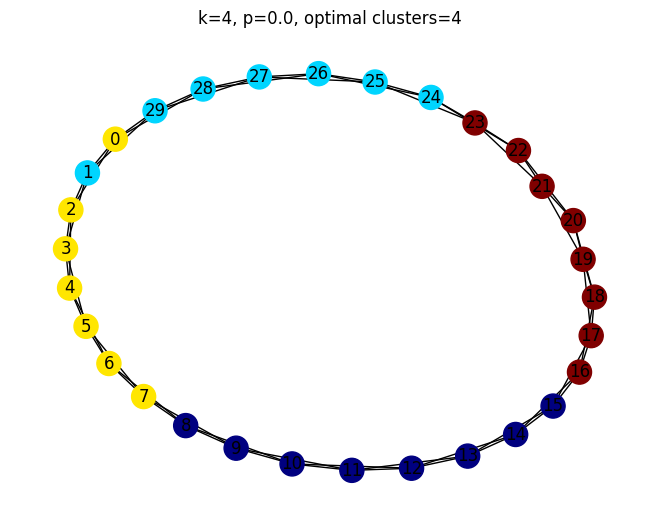

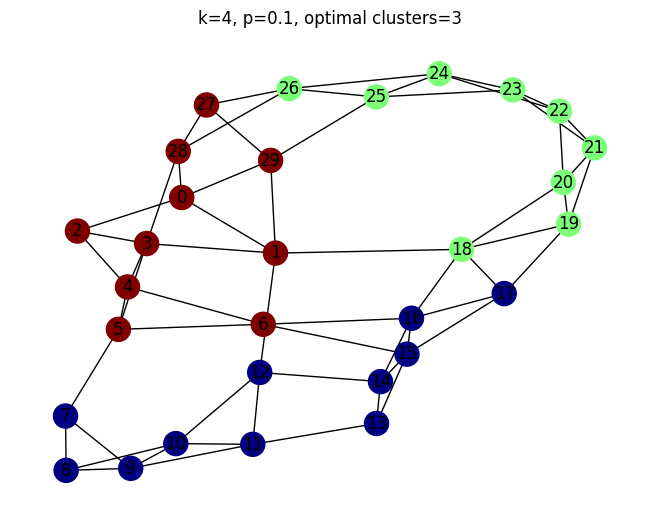

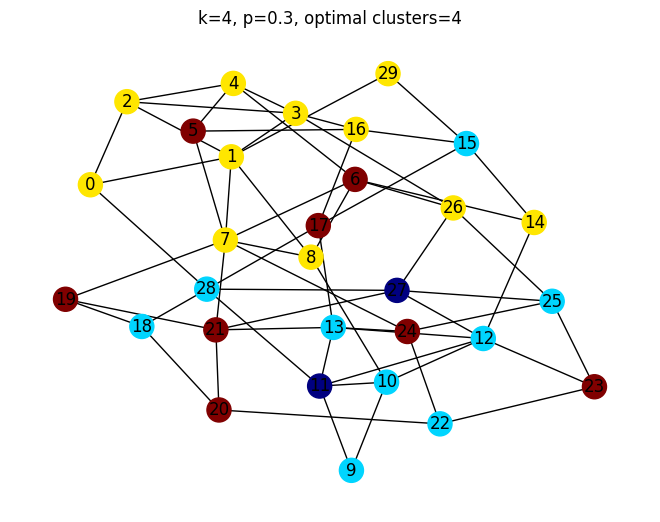

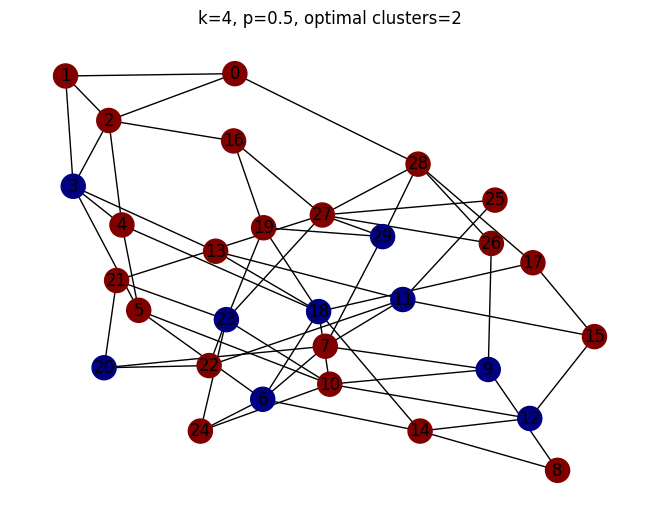

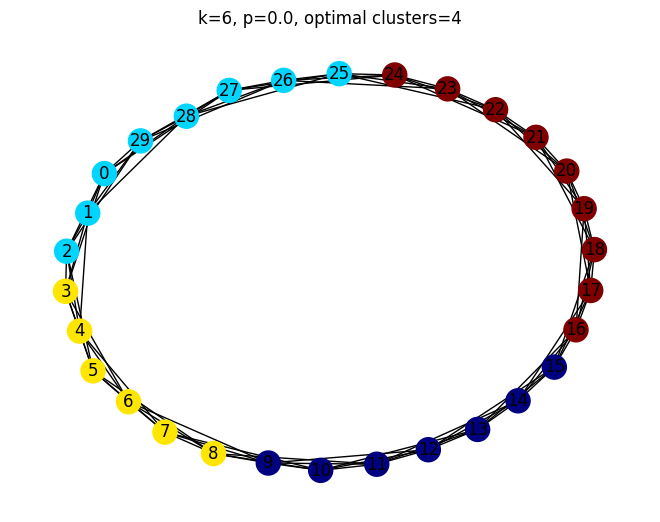

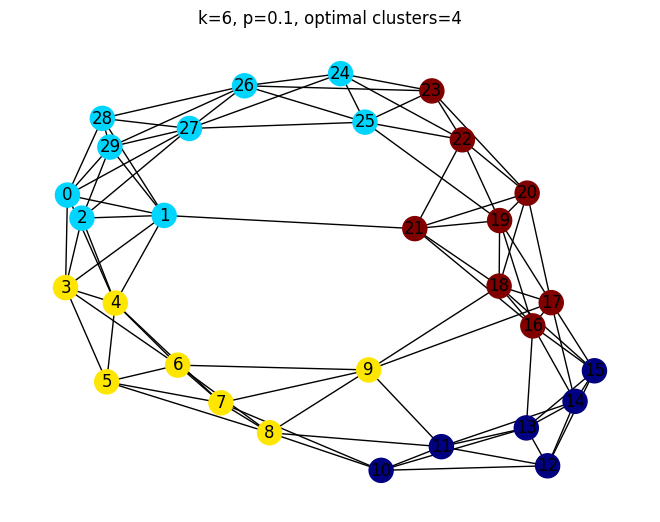

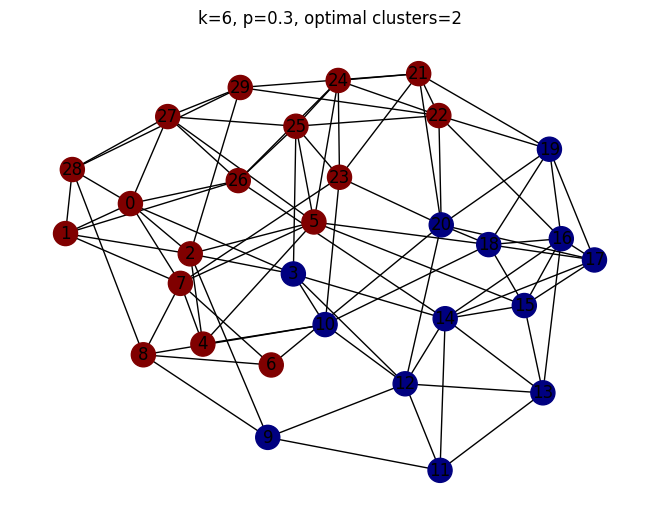

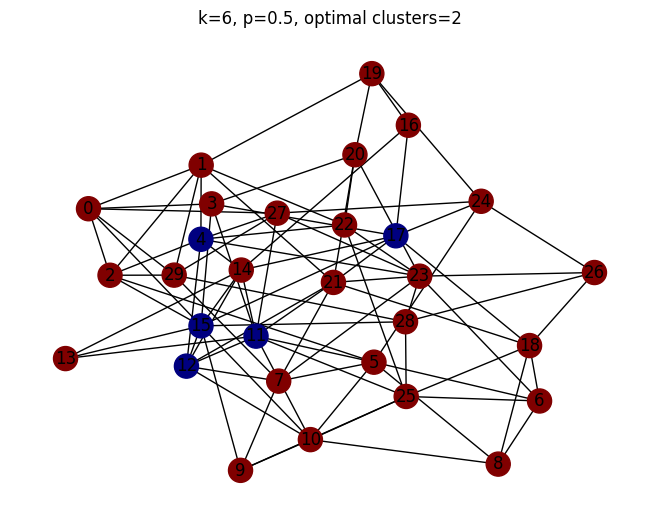

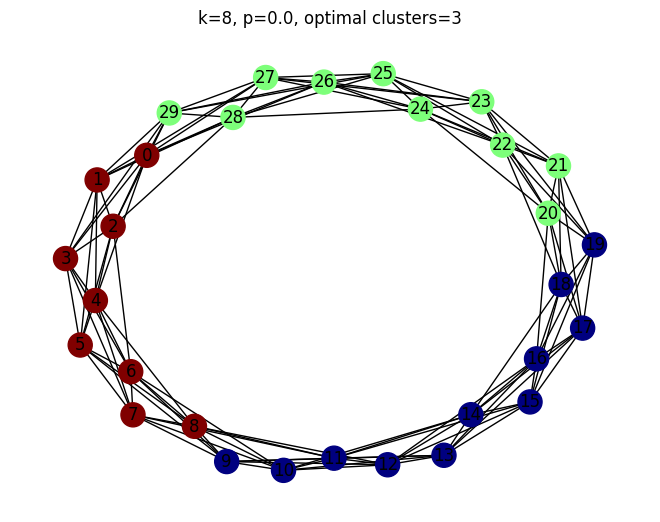

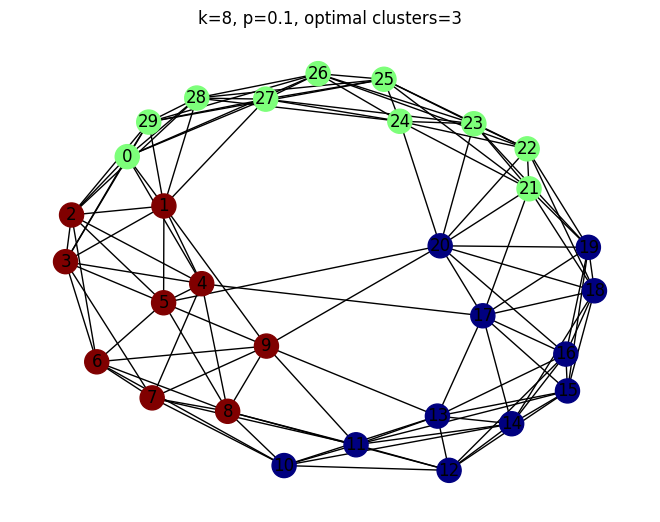

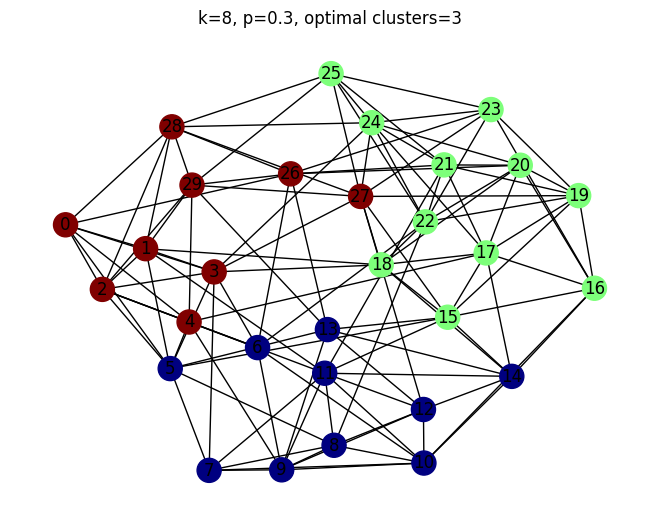

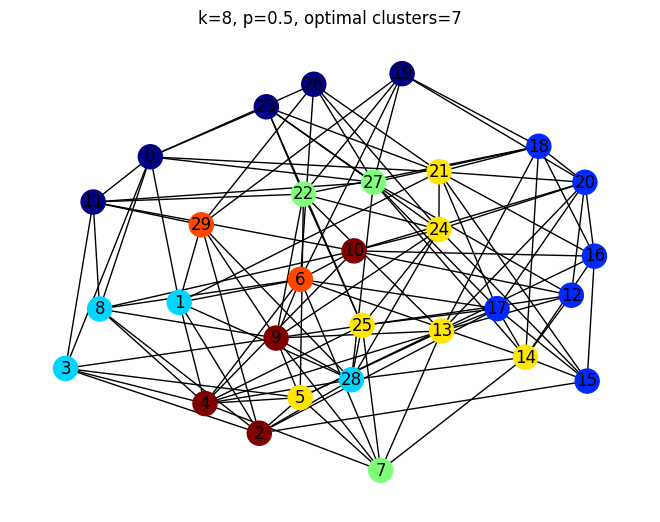

[{'k': 4,
  'p': 0.0,
  'optimal_clusters': 4,
  'clustering_coefficient': 0.5,
  'shortest_path_length': 4.137931034482759,
  'best_silhouette': np.float64(0.10615443632607628)},
 {'k': 4,
  'p': 0.1,
  'optimal_clusters': 3,
  'clustering_coefficient': 0.36888888888888893,
  'shortest_path_length': 3.064367816091954,
  'best_silhouette': np.float64(0.0913886048236354)},
 {'k': 4,
  'p': 0.3,
  'optimal_clusters': 4,
  'clustering_coefficient': 0.17365079365079367,
  'shortest_path_length': 2.533333333333333,
  'best_silhouette': np.float64(0.057751694187552265)},
 {'k': 4,
  'p': 0.5,
  'optimal_clusters': 2,
  'clustering_coefficient': 0.13746031746031748,
  'shortest_path_length': 2.510344827586207,
  'best_silhouette': np.float64(0.06756084830623052)},
 {'k': 6,
  'p': 0.0,
  'optimal_clusters': 4,
  'clustering_coefficient': 0.6,
  'shortest_path_length': 2.9310344827586206,
  'best_silhouette': np.float64(0.15966383388968072)},
 {'k': 6,
  'p': 0.1,
  'optimal_clusters': 4,
  'c

In [10]:
k_p_results = []

for k in k_values:
    for p in p_values:
        G, adj_matrix = generate_graph_and_features(n, k, p)

        Ks, wcss, silhouette_scores = find_optimal_clusters(adj_matrix, max_k=8)
        optimal_k = Ks[np.argmax(silhouette_scores)]
        kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(adj_matrix)
        labels = kmeans.labels_
        
        plot_graph_clusters(G, labels, title=f"k={k}, p={p}, optimal clusters={optimal_k}")
        
        try:
            shortest_path = nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            shortest_path = None  # Graph is disconnected
        
        k_p_results.append({
            'k': k,
            'p': p,
            'optimal_clusters': optimal_k,
            'clustering_coefficient': nx.average_clustering(G),
            'shortest_path_length': shortest_path,
            'best_silhouette': max(silhouette_scores)
        })

k_p_results


In [11]:
results = k_p_results
def score(config):
    C = config['clustering_coefficient']
    L = config['shortest_path_length']
    S = config['best_silhouette']
    return (C * 0.5) - (L * 0.3) + (S * 0.2)  

# we give highest weight to clustering coefficient, then shortest path length (we want it small thats why we subtract but the weight 0.3 still higher than silhouette) and then silhouette score
# because we want clean good quality clusters - this is based on what you want - since im defining my problem in prisoners dilemma i want to see clean clusters forming in small groups wbased on their finite interactions

scored_configs = [{**config, 'score': score(config)} for config in results]

best_configs = sorted(scored_configs, key=lambda x: x['score'], reverse=True)

best_configs

[{'k': 8,
  'p': 0.1,
  'optimal_clusters': 3,
  'clustering_coefficient': 0.5828571428571426,
  'shortest_path_length': 2.117241379310345,
  'best_silhouette': np.float64(0.18041968478579903),
  'score': np.float64(-0.3076599054073723)},
 {'k': 8,
  'p': 0.3,
  'optimal_clusters': 3,
  'clustering_coefficient': 0.37783068783068785,
  'shortest_path_length': 1.8413793103448275,
  'best_silhouette': np.float64(0.11317844692301154),
  'score': np.float64(-0.34086275980350195)},
 {'k': 8,
  'p': 0.0,
  'optimal_clusters': 3,
  'clustering_coefficient': 0.6428571428571427,
  'shortest_path_length': 2.3448275862068964,
  'best_silhouette': np.float64(0.19454444221200815),
  'score': np.float64(-0.34311081599109594)},
 {'k': 8,
  'p': 0.5,
  'optimal_clusters': 7,
  'clustering_coefficient': 0.2722991822991823,
  'shortest_path_length': 1.7816091954022988,
  'best_silhouette': np.float64(0.05802114169904187),
  'score': np.float64(-0.3867289391312901)},
 {'k': 6,
  'p': 0.3,
  'optimal_clust